**Example 1:**
We will use K-means to perform color segmentation on an image.

In [3]:
# Mount Google Drive so that we can access the picture
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Specify the path of your image
# Note that your Google Drive path ALWAYS starts with "/content/drive/MyDrive/"
path = "/content/drive/MyDrive/courses/JII-October-2023/"

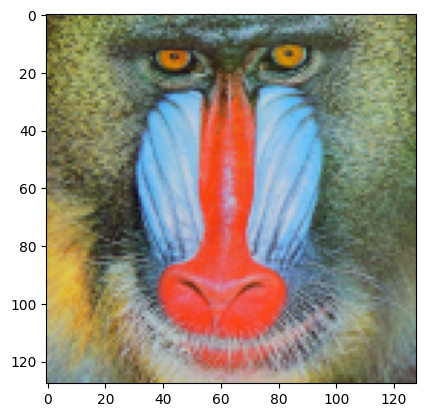

In [5]:
# Let's load the image to which we want to apply color segmentation and plot it
import matplotlib.pyplot as plt
import PIL
img = PIL.Image.open(path + "mandrill-small.tiff")
plt.imshow(img)

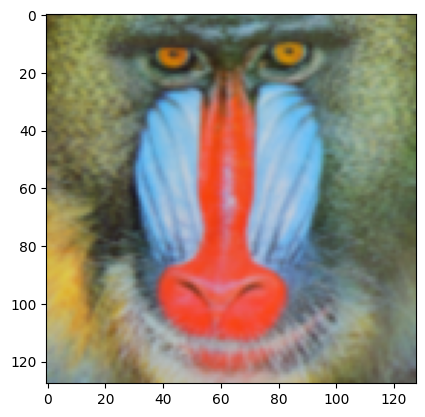

In [2]:
## If you wanted to take a picture directly from the internet
import urllib.request
from PIL import Image
#
# # Retrieving the resource located at the URL
# # and storing it in the file name a.png
# url = "https://cdn.britannica.com/22/226322-050-C17930D6/Bengal-tiger-Panthera-tigris-tigris-Maharastra-India.jpg"
url = "https://github.com/jesusdfc/JII/blob/main/kmeans_example.png?raw=true"
urllib.request.urlretrieve(url, "tiger.png")

# Opening the image and displaying it (to confirm its presence)
img_web = Image.open(r"tiger.png")
plt.imshow(img_web)

In [ ]:
# from PIL import Image

# # downsize the image with an ANTIALIAS filter (gives the highest quality)
# img = img.resize((110,160),Image.ANTIALIAS)
# plt.imshow(img)

In [ ]:
# Let's check its size
import numpy as np
rgb_pixels_big = np.array(img)
rgb_pixels_big.shape

In [ ]:
width = rgb_pixels_big.shape[0]
height = rgb_pixels_big.shape[1]
print(width)
print(height)

Image of 128 x 128 pixels, with each pixel having 3 channels (R, G, B)

In [ ]:
# Let's reshape the image to a vector of pixels (ponemos la imagen en un vector)
img_vector = np.array(img)
img_vector = img_vector.reshape((width*height, 3))
img_vector.shape

In [ ]:
# We will now apply Kmeans with K=16 to cluster similar pixels together
from sklearn.cluster import KMeans
k = 16
kmeans = KMeans(n_clusters=k)

# Cluster assignmet for each pixel is stored in vector 'y_pred'
y_pred = kmeans.fit_predict(img_vector)


In [ ]:
# y_pred contains the cluster assignment to each pixel (it should range from 0 to 15)
y_pred

In [ ]:
# We can check how many pixels are assigned to each cluster
np.unique(y_pred, return_counts=True)

In [ ]:
# Let's check the centroids (representative) for each cluster
# The clsuter representative is the average of all pixels assigned to that cluster,
# so it can be viewed as the "average pixel" (it should have 3 values for the R, G, B channles)
kmeans.cluster_centers_

In [ ]:
# Let's plot the centroids to understand better how the clusters look like
tmp = kmeans.cluster_centers_.reshape(16,1,3)
plt.imshow(np.uint8(tmp))

In [ ]:
tmp.shape

In [ ]:
# Let's plot some of the pixels assigned to a specific cluster
# cluster = 0
# tmp = np.unique(y_pred, return_counts=True)
# num_pixels_assigned_to_cluster = tmp[1][cluster]
# num_pixels_assigned_to_cluster

In [ ]:
cluster = 1
pixels_in_cluster = img_vector[y_pred == cluster][0:100]
tmp1 = pixels_in_cluster.reshape(10, 10, 3)
plt.imshow(np.uint8(tmp1))


In [ ]:
pixels_in_cluster[0:400].shape

In [ ]:
# Now we need to substitute the pixel in the original image by the centroid of the cluster they are assigned to
new_image_vector = kmeans.cluster_centers_[y_pred]
new_image_vector.shape

In [ ]:
# Let's check the pixel value (R,G,B) of the first pixel
new_image_vector[0]

Does it make sense?

In [ ]:
# Let's chec the cluster assignment of teh first pixel
y_pred[0]

In [ ]:
# The new pixel should have values equal to the centroid of that cluster
kmeans.cluster_centers_[10]

In [ ]:
# Reshape back to (128,128,3) to plot it
new_image = new_image_vector.reshape(width,height,3)
plt.imshow(np.uint8(new_image))

In [ ]:
# Let's see how the reconstruction changes for different values of K
knumber = [5, 10, 16, 32, 64, 128]
f, axarr = plt.subplots(2,3)
row = 0
col = 0
for k in knumber:
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(img_vector)
  new_image_vector = kmeans.cluster_centers_[y_pred]
  new_image = new_image_vector.reshape(128,128,3)
  axarr[row,col].imshow(np.uint8(new_image))
  axarr[row,col].set_title(f"K=%d" % k)
  col += 1
  if col == 3:
    row = 1
    col = 0